In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [8]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

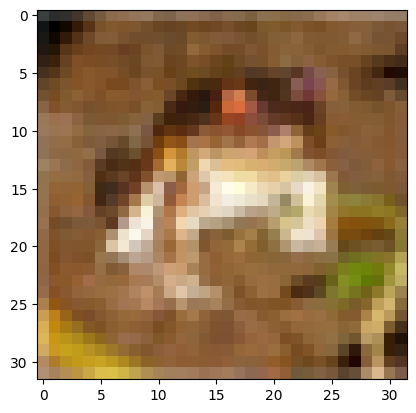

In [9]:
plt.imshow(train_images[0])

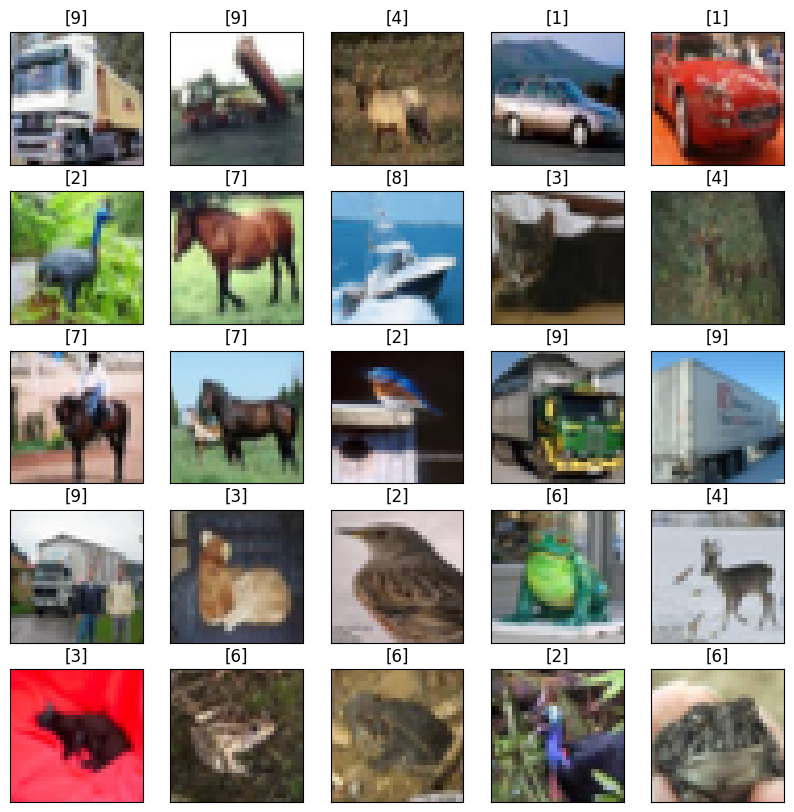

In [11]:
fig=plt.figure(figsize=(10, 10))
rows, columns = 5, 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(f"{train_labels[i]}")
plt.show()

In [14]:
model = Sequential([
    keras.Input(shape = (32, 32, 3)),
    Conv2D(32, 3, activation = "relu"),
    MaxPooling2D(),
    Conv2D(64, 3, activation = "relu"),
    MaxPooling2D(),
    Conv2D(128, 3, activation = "relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(10)
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"])

In [19]:
history = model.fit(train_images, train_labels, batch_size = 32, epochs = 10, verbose = True)

Epoch 1/10
1563/1563 [==============================] - 14s 4ms/step - loss: 1.5018 - accuracy: 0.4489
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1174 - accuracy: 0.6047
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9566 - accuracy: 0.6646
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8503 - accuracy: 0.7010
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7665 - accuracy: 0.7312
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6990 - accuracy: 0.7562
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6416 - accuracy: 0.7752
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5872 - accuracy: 0.7933
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5384 - accuracy: 0.8107
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.50

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

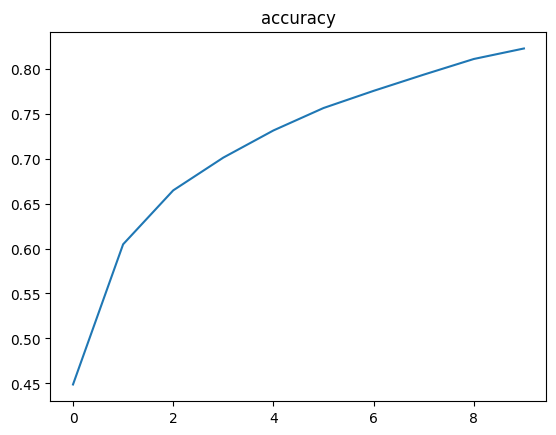

In [21]:
plt.plot(history.history['accuracy'])
plt.title(f"accuracy")
plt.show()

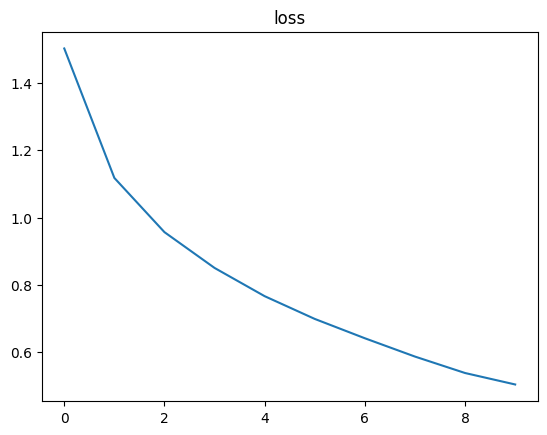

In [22]:
plt.plot(history.history['loss'])
plt.title(f"loss")
plt.show()

In [23]:
test_history = model.evaluate(test_images, test_labels, batch_size = 8)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.9053 - accuracy: 0.7213


In [24]:
test_history

[0.9052514433860779, 0.7213000059127808]